# Proyecto final: Clasificación de tumores cerebrales en MRI 
## Larissa Rodríguez Millán 
### Red Neuronal Convolucional (CNN) 

In [1]:
import sys
print(sys.executable)

C:\Users\laris\anaconda3\envs\tf_project\python.exe


In [23]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

train_path = r"C:\Users\laris\OneDrive\Documentos\LNC\Modeloscomputacionales\modelos_II\S06_proyecto\dataset\Training"
test_path = r"C:\Users\laris\OneDrive\Documentos\LNC\Modeloscomputacionales\modelos_II\S06_proyecto\dataset\Testing"

### 1.- Análisis exploratorio de datos (AED)

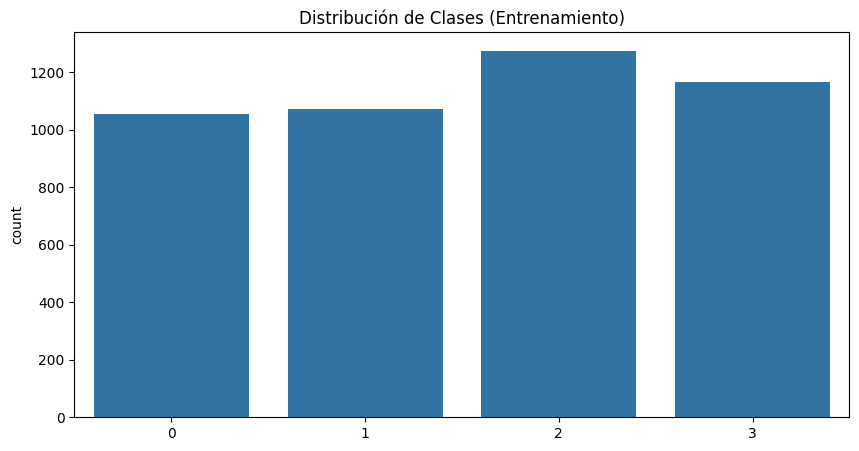

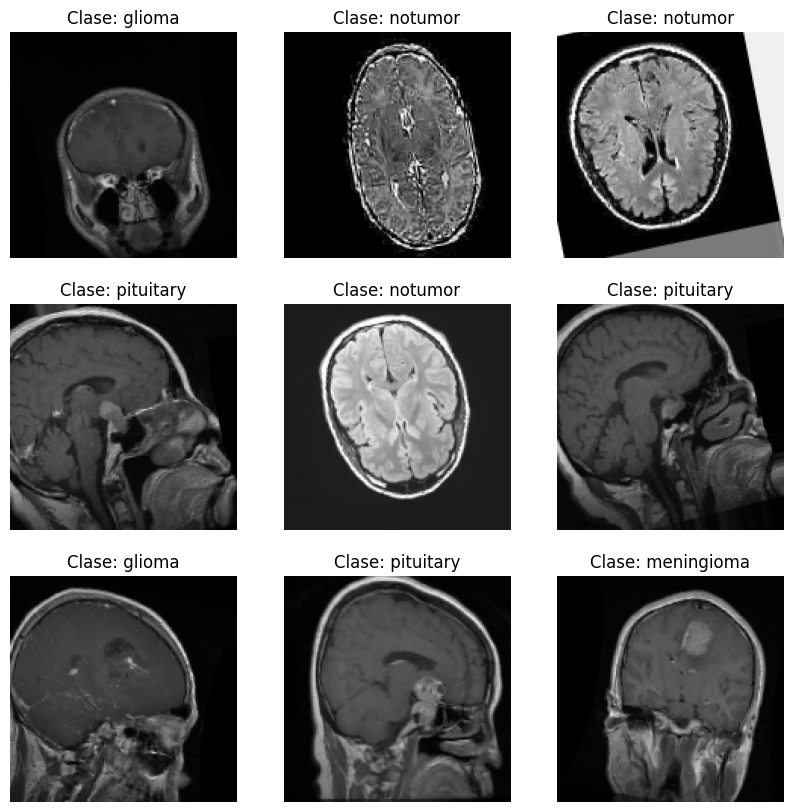

In [30]:
# Distribución de clases
plt.figure(figsize=(10, 5))
sns.countplot(x=train_generator.classes)
plt.title("Distribución de Clases (Entrenamiento)")
plt.show()

# Visualización de imágenes
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("Clase: " + list(train_generator.class_indices.keys())[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

In [32]:
# Añade análisis de dimensiones y estadísticos básicos
print("Número de imágenes por clase (train):", {class_name: sum(train_generator.classes == i) for i, class_name in enumerate(train_generator.class_indices.keys())})

Número de imágenes por clase (train): {'glioma': 1057, 'meningioma': 1072, 'notumor': 1276, 'pituitary': 1166}


### 2.- Identifico el problema 

In [35]:
# Es un problema de clasificiación. 
print("Clases:", train_generator.class_indices)

Clases: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


### 3.- Propuesta de modelo CNN

In [43]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases
])

from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Congela capas
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

58889256/58889256 [==============================] - 6s 0us/step


Epoch 1/15
143/143 [==============================] - 156s 1s/step - loss: 0.9678 - accuracy: 0.5673 - val_loss: 0.8897 - val_accuracy: 0.6591
Epoch 2/15
143/143 [==============================] - 85s 595ms/step - loss: 0.6832 - accuracy: 0.7198 - val_loss: 1.0185 - val_accuracy: 0.6319
Epoch 3/15
143/143 [==============================] - 89s 620ms/step - loss: 0.5607 - accuracy: 0.7777 - val_loss: 0.9607 - val_accuracy: 0.6687
Epoch 4/15
143/143 [==============================] - 88s 613ms/step - loss: 0.5555 - accuracy: 0.7633 - val_loss: 0.7521 - val_accuracy: 0.7450
Epoch 5/15
143/143 [==============================] - 88s 618ms/step - loss: 0.4819 - accuracy: 0.8084 - val_loss: 0.7289 - val_accuracy: 0.7125
Epoch 6/15
143/143 [==============================] - 90s 628ms/step - loss: 0.4524 - accuracy: 0.8239 - val_loss: 0.6861 - val_accuracy: 0.7739
Epoch 7/15
143/143 [==============================] - 90s 626ms/step - loss: 0.4420 - accuracy: 0.8296 - val_loss: 0.6816 - val_accu

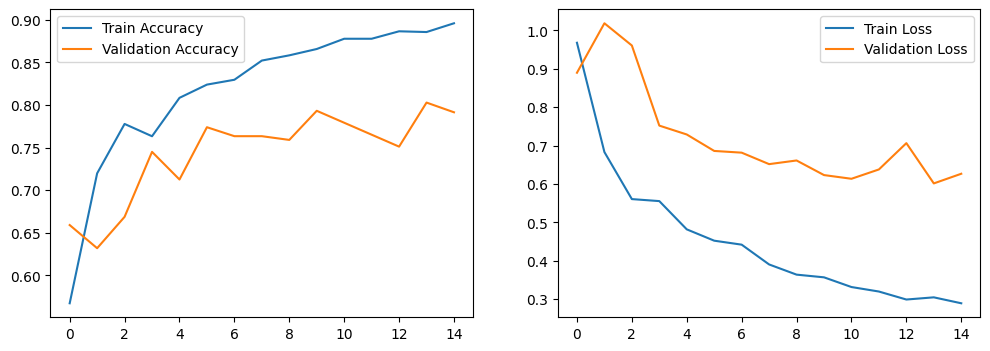

In [19]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

# Gráficas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 4.- Evaluación de resultados 

              precision    recall  f1-score   support

      glioma       0.87      0.78      0.83       300
  meningioma       0.72      0.55      0.63       306
     notumor       0.81      1.00      0.89       405
   pituitary       0.90      0.94      0.92       300

    accuracy                           0.83      1311
   macro avg       0.83      0.82      0.82      1311
weighted avg       0.83      0.83      0.82      1311



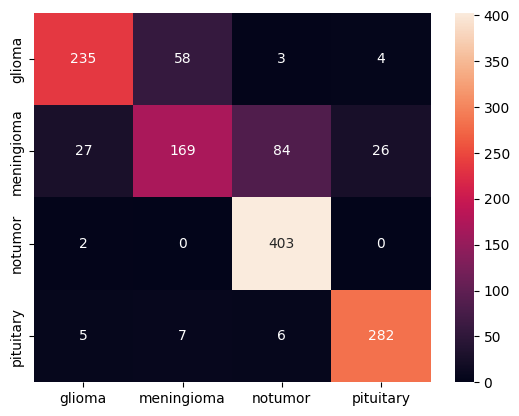

In [46]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())

# Reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

### 5.- Análisis de resultados 

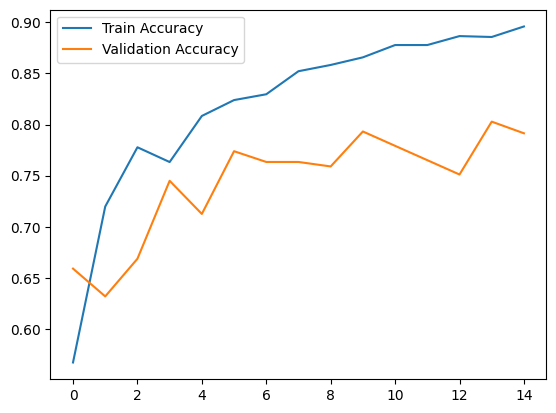

In [49]:
# Comparación entre entrenamiento/validación
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Para esta tarea de clasificación de imágenes de resonancia magnética cerebral, se eligió la arquitectura VGG16 debido a su eficacia comprobada en tareas de clasificación de imágenes médicas y su estructura profunda pero ordenada, lo que facilita la adaptación mediante aprendizaje por transferencia. VGG16 ha demostrado buen rendimiento en problemas donde los patrones visuales son complejos pero localizables, como ocurre en los tumores cerebrales. Además, al contar con pesos preentrenados en ImageNet, permite aprovechar representaciones visuales generales que se pueden refinar con un número reducido de muestras específicas del dominio médico, lo que es ideal para este tipo de datasets.

El modelo entrenado se basó en VGG16 con sus capas convolucionales congeladas, añadiendo una cabeza densa personalizada para clasificación multiclase. El conjunto de datos incluyó cuatro categorías: glioma, meningioma, pituitaria y sin tumor.

Tras 15 épocas de entrenamiento, el modelo alcanzó un accuracy de 0.83 en el conjunto de prueba. Las curvas de pérdida y exactitud muestran una diferencia moderada entre entrenamiento y validación (~10 puntos porcentuales), lo cual sugiere un sobreajuste leve pero manejable.

La matriz de confusión reveló una excelente capacidad para detectar imágenes sin tumor (403/405 correctas), así como un desempeño destacado en la clasificación de tumores pituitarios (282/300). En cambio, la clase meningioma mostró la mayor tasa de error: solo 169 de 306 imágenes fueron clasificadas correctamente, mientras que 84 se confundieron con la clase “sin tumor” y 27 con glioma. Esta confusión puede atribuirse a la similitud visual entre meningiomas y otras clases tumorales, así como a un posible desbalance en la representación de patrones específicos dentro del conjunto de entrenamiento.

En cuanto a las métricas por clase, los valores de precisión, recall y F1-score se mantuvieron altos en general, aunque nuevamente el punto débil fue la baja sensibilidad hacia meningiomas (recall ≈ 0.55), lo cual podría afectar aplicaciones clínicas si no se corrige.a cual seguir mejorando.


### Conclusiones

El modelo logró una clasificación automática de imágenes de resonancia magnética con un desempeño global satisfactorio, destacando en la identificación de casos negativos y de tumores pituitarios. Sin embargo, la detección de meningiomas representa un área crítica de mejora, posiblemente influenciada por la similitud morfológica con otras neoplasias y la arquitectura utilizada (VGG16 sin fine-tuning profundo).

Este experimento valida que el aprendizaje por transferencia es una estrategia eficaz para tareas médicas con conjuntos limitados, pero también subraya la necesidad de ajustes más específicos para mejorar la precisión en escenarios clínicamente delicados.

En conjunto, este modelo representa un paso prometedor hacia el apoyo automatizado al diagnóstico médico por imágenes, y con ajustes adicionales, podría integrarse en flujos de trabajo clínicos como asistencia diagnóstica.